In [1]:
#References:
#https://machinelearningmastery.com/object-recognition-convolutional-neural-networks-keras-deep-learning-library/

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import toimage
import matplotlib.pyplot as plt

In [31]:
from keras.datasets import cifar10

In [32]:
(x_train,y_train), (x_test,y_test)=cifar10.load_data()

In [33]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [34]:
#Reduced the train dataset from 50000 to 500 and test dataset from 10000 to 100 (Since Only CPU is available)
x_train=x_train[:500]
y_train=y_train[:500]
x_test=x_test[:100]
y_test=y_test[:100]
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(500, 32, 32, 3)
(500, 1)
(100, 32, 32, 3)
(100, 1)


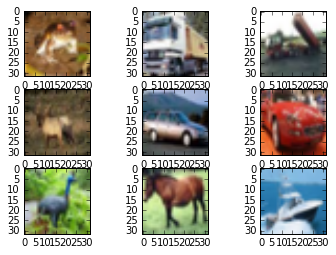

In [35]:
for i in range(0,9):
    plt.subplot(330+1+i)
    plt.imshow(toimage(x_train[i]))
plt.show()

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('tf')

In [37]:
np.random.seed(7)

In [38]:
#Normalize dataset (First convert integers to floating point then divide by 255)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train=x_train/255.0
x_test=x_test/255.0

In [39]:
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
num_class=y_test.shape[1]

In [41]:
x_test.shape

(100, 32, 32, 3)

In [42]:
model=Sequential()
model.add(Conv2D(32, (3,3), input_shape=(32,32,3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_class, activation='softmax'))

epochs=2
lrate=0.01
decay=lrate/epochs
sgd=SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
__________

In [43]:
x_test.shape

(100, 32, 32, 3)

In [44]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=32)
scores=model.evaluate(x_test,y_test,verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 500 samples, validate on 100 samples
Epoch 1/2
500/500 [==============================] - 5s 9ms/step - loss: 2.3235 - acc: 0.1180 - val_loss: 2.2738 - val_acc: 0.1200
Epoch 2/2
500/500 [==============================] - 3s 6ms/step - loss: 2.2403 - acc: 0.1460 - val_loss: 2.1881 - val_acc: 0.2600
Accuracy: 26.00%
